In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from myfile import plot_box_plot,read_csv_morceaux,group_and_loc_group,plot_function,correl_pvalue, create_régression_linéaire
from scipy import stats
#from scipy.stats import ttest_ind, ttest_ind_from_stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image

import warnings
warnings.simplefilter(action='ignore', category=Warning)

regr = linear_model.LinearRegression()    # Create linear regression object
sns.set()

In [119]:
pd.set_option("display.precision", 2)          
pd.set_option("display.max.columns", None)    
pd.set_option("display.max.rows", None)

dir_data = Path('../../DATA/P3/') 
dir_fig  = Path('../../FIGURES/P3/')

marche_FR = 0
if marche_FR == 1: 
    region = 'FR_'
    file1 = Path(str(dir_data) + "/Projet.openfoodfacts.org.products.csv")
else:
    region = 'GLOBAL_'
    file1 = Path(str(dir_data) + "/Projet_NScore.openfoodfacts.org.products.csv")


df_in =pd.read_csv(str(file1),  sep='\t', encoding='utf-8', low_memory=False)


In [120]:
marche_FR = 0
if marche_FR == 1: 
    df=pd.melt(frame=df_in, 
    id_vars   =["nutriscore_grade",'product_name','categories','countries_en'] ,
    value_vars=["sugars_100g","saturated-fat_100g",'energy-kcal_100g','sodium_100g','carbohydrates_100g','proteins_100g','fat_100g'],
    var_name  ="Food_composition", 
    value_name="Quantities")
else:
    df=pd.melt(frame=df_in, 
    id_vars   =["nutriscore_grade",'product_name','categories','countries_en','ecoscore_grade_fr','nova_group'] ,
    value_vars=["sugars_100g","saturated-fat_100g",'energy-kcal_100g','sodium_100g','carbohydrates_100g','proteins_100g','fat_100g','ingredients_that_may_be_from_palm_oil_n',\
           'ingredients_from_palm_oil_n'],
    var_name  ="Food_composition", 
    value_name="Quantities")
    
    
    
    
    

In [121]:
if marche_FR == 1:
    df1=df[df['countries_en']=="France"]
else:
    df1=df

In [122]:
df1.tail()

,nutriscore_grade,product_name,categories,countries_en,ecoscore_grade_fr,nova_group,Food_composition,Quantities
3561889,d,Mousse au chocolat noir,"Desserts, Desserts au chocolat, Mousses au cho...",France,d,NaN,ingredients_from_palm_oil_n,NaN
3561890,b,Riz parfumé,"Aliments et boissons à base de végétaux, Alime...",France,c,NaN,ingredients_from_palm_oil_n,NaN
3561891,d,Minis beignets,"Snacks, Snacks sucrés, Beignets sucrés",France,NaN,NaN,ingredients_from_palm_oil_n,NaN
3561892,d,Erdbeerkuchen 1019g tiefgefroren,"Kekse und Kuchen, Kuchen, Tiefkühl-Kuchen",Germany,NaN,4.0,ingredients_from_palm_oil_n,0.0
3561893,a,Faux filet,"Viandes, Bœuf, Steaks, Steaks de bœuf, Steaks ...",France,e,NaN,ingredients_from_palm_oil_n,NaN


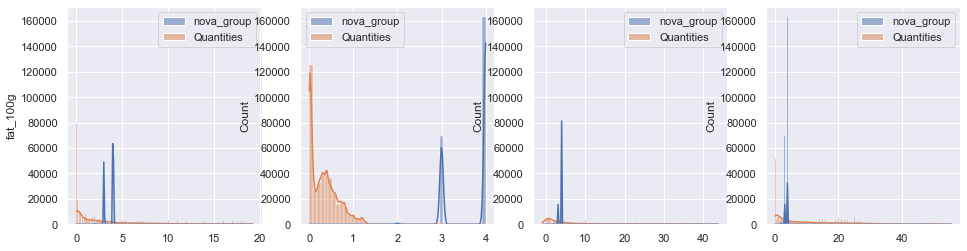

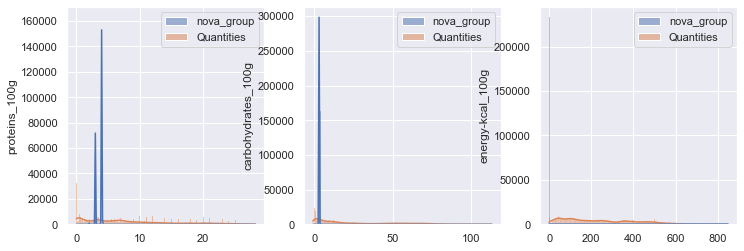

In [123]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
#
g=sns.histplot(data=df1[df1['Food_composition']=='saturated-fat_100g'], color="teal",kde=True, ax=axs[0])
g.set( ylabel = "saturated-fat_100g")
sns.histplot(data=df1[df1['Food_composition']=='sodium_100g'], color="teal",kde=True, ax=axs[1])
g.set( ylabel = "sodium_100g")
sns.histplot(data=df1[df1['Food_composition']=='sugars_100g'], color="teal", kde=True, ax=axs[2])
g.set( ylabel = "sugars_100g")
sns.histplot(data=df1[df1['Food_composition']=='fat_100g'],  kde=True, color="teal", ax=axs[3])
g.set( ylabel = "fat_100g")
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
#
g=sns.histplot(data=df1[df1['Food_composition']=='proteins_100g'], color="teal", kde=True, ax=axs[0])
g.set( ylabel = "proteins_100g")
g=sns.histplot(data=df1[df1['Food_composition']=='carbohydrates_100g'], color="teal", kde=True, ax=axs[1])
g.set( ylabel = "carbohydrates_100g")
g=sns.histplot(data=df1[df1['Food_composition']=='energy-kcal_100g'],  kde=True, color="teal", ax=axs[2])
g.set( ylabel = "energy-kcal_100g")
plt.show()


[Text(0.5, 0, 'Nutriscore'), Text(0, 0.5, 'sodium_100g')]

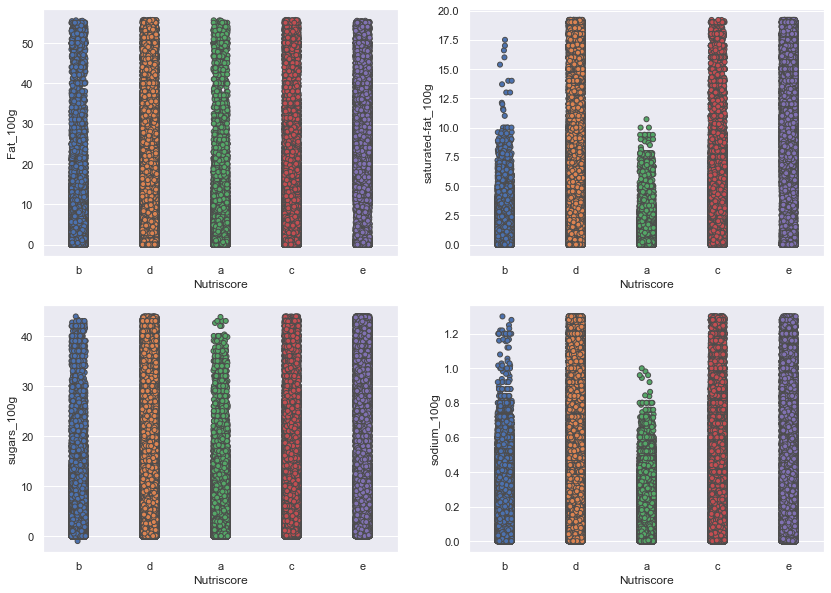

In [124]:
fig, axs = plt.subplots (2, 2, figsize=(14, 10))
g=sns.stripplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='fat_100g'], ax=axs[0,0],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "Fat_100g")
#
g=sns.stripplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='saturated-fat_100g'], ax=axs[0,1],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "saturated-fat_100g")
#
g=sns.stripplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='sugars_100g'], ax=axs[1,0],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "sugars_100g")
g=sns.stripplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='sodium_100g'], ax=axs[1,1],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "sodium_100g")

[Text(0.5, 0, 'Nutriscore'), Text(0, 0.5, 'Energy-kcal_100g')]

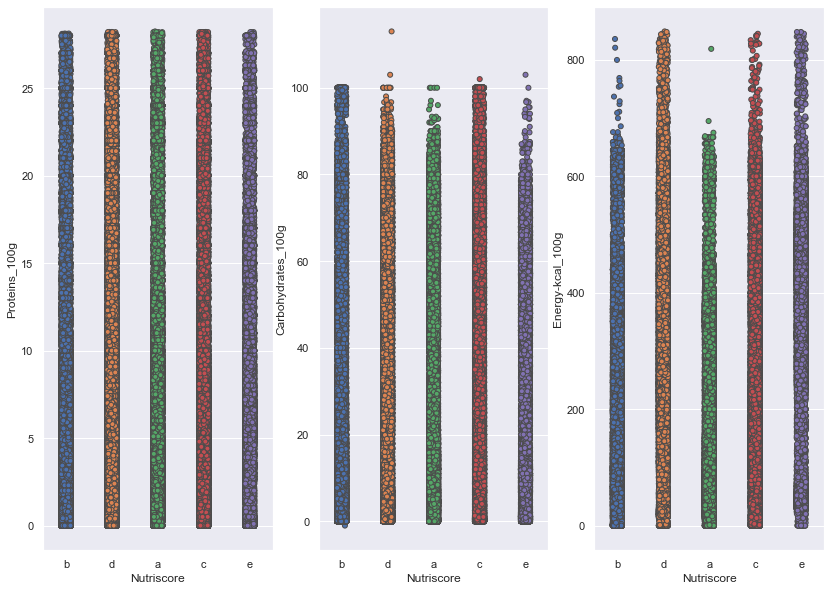

In [125]:
fig, axs = plt.subplots (1, 3, figsize=(14, 10))
g=sns.stripplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='proteins_100g'], ax=axs[0],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "Proteins_100g")
g=sns.stripplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='carbohydrates_100g'], ax=axs[1],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "Carbohydrates_100g")
g=sns.stripplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='energy-kcal_100g'], ax=axs[2],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "Energy-kcal_100g")
#g=sns.stripplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='ingredients_from_palm_oil_n'], ax=axs[1,1],linewidth=1)
#g.set(xlabel = "Nutriscore", ylabel = "ingredients_from_palm_oil_n")

[Text(0.5, 0, 'Nutriscore'), Text(0, 0.5, 'sodium_100g')]

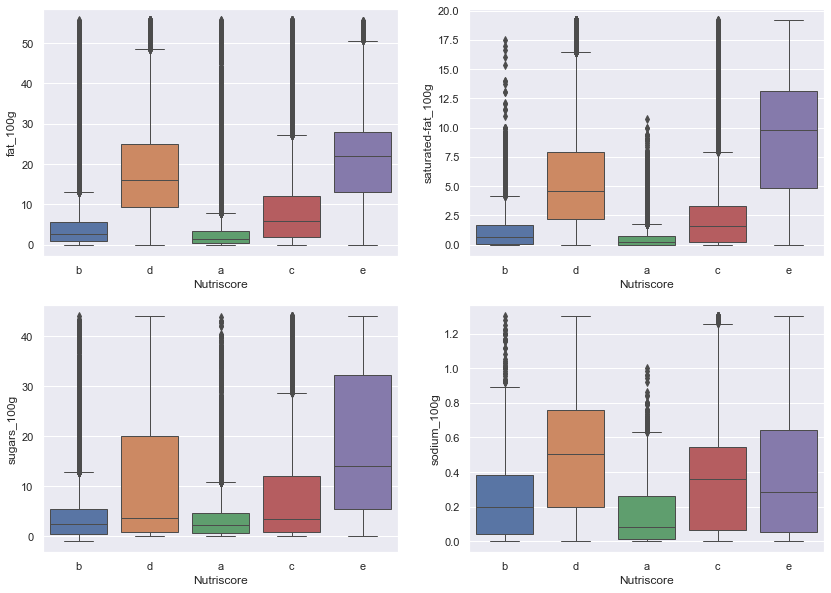

In [126]:
fig, axs = plt.subplots (2, 2, figsize=(14, 10))
# plot boxplot
gfg = sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='fat_100g'], ax=axs[0,0],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = "fat_100g")

gfg = sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='saturated-fat_100g'], ax=axs[0,1],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = "saturated-fat_100g")

gfg = sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='sugars_100g'], ax=axs[1,0],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = "sugars_100g")

gfg = sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='sodium_100g'], ax=axs[1,1],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = "sodium_100g")

[Text(0.5, 0, 'Nutriscore'), Text(0, 0.5, 'Energy-kcal_100g')]

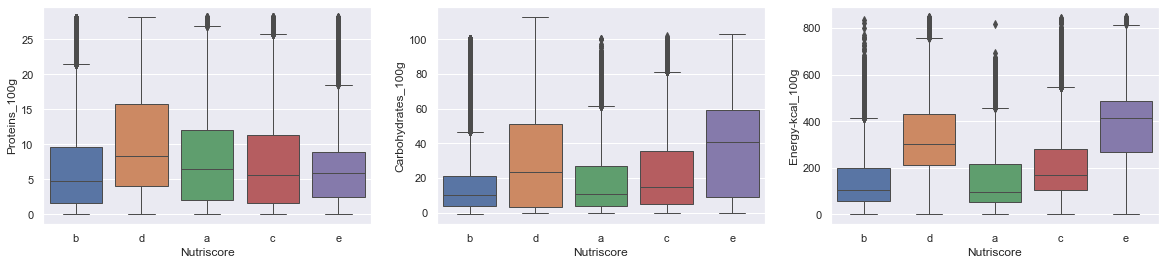

In [127]:
fig, axs = plt.subplots (1, 3, figsize=(20,4))
g=sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='proteins_100g'], ax=axs[0],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "Proteins_100g")
g=sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='carbohydrates_100g'], ax=axs[1],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "Carbohydrates_100g")
g=sns.boxplot(x='nutriscore_grade', y='Quantities', data=df1[df1['Food_composition']=='energy-kcal_100g'], ax=axs[2],linewidth=1)
g.set(xlabel = "Nutriscore", ylabel = "Energy-kcal_100g")

### Quel est l'origine de ces carbohydrates dans des produits avec nutriscore D  et E? simple or complex carbohydrates?

#---simple carbohydrates ----- > monosaccharides (fructose (found in fruits) and galactose (found in milk products)), disaccharides (sucrose (table sugar), lactose (from dairy) and maltose (found in beer and some vegetables))
#---"empty calories" and can lead to weight gain
#---Complex carbohydrates (polysaccharides) include beans, peas, lentils, peanuts, potatoes, corn, parsnips, whole-grain breads and cereals.

### D et E sont tres energetiques. à cause de processed and refined sugars (empty calories")?  C'est à eviter


In [129]:
data_corr = df_in.drop(["Unnamed: 0","nutriscore_grade",'product_name','categories','countries_en','ecoscore_grade_fr','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','salt_100g'], axis=1)
data_corrff = df_in.drop(["Unnamed: 0",'product_name','categories','countries_en','ecoscore_grade_fr','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','salt_100g'], axis=1)
data_corrff=data_corrff.dropna()
data_corr = data_corr.dropna()
[coef_correl,pvalue] = correl_pvalue(data_corr)

In [130]:
pvalue.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,nutriscore_score,nova_group,ecoscore_score_fr,fat_100g,saturated-fat_100g,energy-kcal_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g
nutriscore_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4e-242,0.0
nova_group,0.0,0.0,0.0,1.5e-16,1.2e-09,2.1e-70,0.0,0.0,0.0,8.8e-34
ecoscore_score_fr,0.0,0.0,0.0,0.0,0.0,0.0,9.7e-41,1.6e-201,0.0,0.0
fat_100g,0.0,1.5e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
saturated-fat_100g,0.0,1.2e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1e-240
energy-kcal_100g,0.0,2.1e-70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
carbohydrates_100g,0.0,0.0,9.7e-41,0.0,0.0,0.0,0.0,0.0,0.0,2.1e-188
sugars_100g,0.0,0.0,1.6e-201,0.0,0.0,0.0,0.0,0.0,0.0,0.0
proteins_100g,1.4e-242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sodium_100g,0.0,8.8e-34,0.0,0.0,1.1e-240,0.0,2.1e-188,0.0,0.0,0.0


In [131]:
coef_correl.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,nutriscore_score,nova_group,ecoscore_score_fr,fat_100g,saturated-fat_100g,energy-kcal_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g
nutriscore_score,1.0,0.19,-0.33,0.63,0.72,0.67,0.4,0.51,0.11,0.33
nova_group,0.19,1.0,-0.14,-0.028,0.02,0.06,0.18,0.27,-0.16,-0.041
ecoscore_score_fr,-0.33,-0.14,1.0,-0.31,-0.29,-0.22,0.045,-0.1,-0.4,-0.15
fat_100g,0.63,-0.028,-0.31,1.0,0.7,0.79,0.19,0.15,0.34,0.25
saturated-fat_100g,0.72,0.02,-0.29,0.7,1.0,0.56,0.13,0.25,0.28,0.11
energy-kcal_100g,0.67,0.06,-0.22,0.79,0.56,1.0,0.69,0.43,0.26,0.17
carbohydrates_100g,0.4,0.18,0.045,0.19,0.13,0.69,1.0,0.62,-0.18,-0.098
sugars_100g,0.51,0.27,-0.1,0.15,0.25,0.43,0.62,1.0,-0.3,-0.32
proteins_100g,0.11,-0.16,-0.4,0.34,0.28,0.26,-0.18,-0.3,1.0,0.41
sodium_100g,0.33,-0.041,-0.15,0.25,0.11,0.17,-0.098,-0.32,0.41,1.0


In [187]:
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

y=data_corrff['nutriscore_score']
X=pd.DataFrame(np.c_[data_corrff['fat_100g'],data_corrff['saturated-fat_100g'],data_corrff['energy-kcal_100g'],data_corr['carbohydrates_100g'],
                     data_corr['sugars_100g'],data_corr['proteins_100g'],data_corr['sodium_100g'], #data_corrff['nova_group'], 
                     data_corrff['ecoscore_score_fr'], data_corrff['nutriscore_grade']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_testc=X_test.values[:,-1]
X_train=X_train.values[:,:-1]
X_test =X_test.values[:,:-1]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
 
df_score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Nutriscore_grade': y_testc,'Actual-Predicted':y_test-y_pred})


In [188]:
print('Coefficients: \n', regr.coef_)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) # Note that for rmse, the lower that value is, the better the fit
test_set_r2 = r2_score(y_test, y_pred)                        # The closer towards 1, the better the fit
print('root-mean-square error ',test_set_rmse)
print('Coefficient of determination:', test_set_r2)


Coefficients: 
 [ 2.39311150e-02  7.93040324e-01  8.27541563e-03 -6.24857721e-03
  2.78436013e-01 -2.33675591e-01  1.24531858e+01 -3.86806720e-02]
root-mean-square error  3.5079418276261447
Coefficient of determination: 0.8263828561706652


In [189]:

y_predit = regr.intercept_ + [np.sum(regr.coef_*X_test[i,:]) for i in range(len(X_test))]
error    = y_predit-y_pred


[(-25.0, 25.0)]

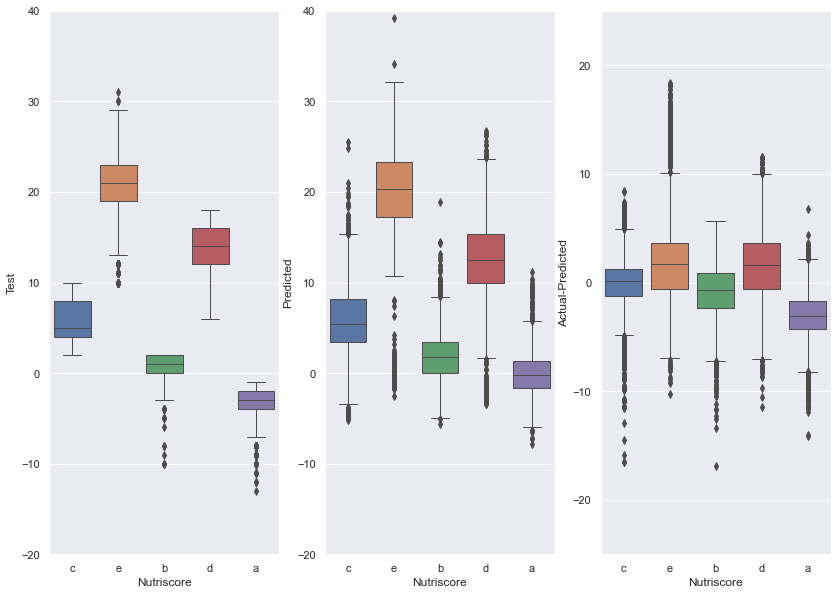

In [190]:
fig, axs = plt.subplots (1, 3, figsize=(14, 10))
# plot boxplot
gfg = sns.boxplot(x='Nutriscore_grade', y='Actual', data=df_score, ax=axs[0],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = "Test")
gfg.set(ylim=(-20, 40))

# plot boxplot
gfg = sns.boxplot(x='Nutriscore_grade', y='Predicted', data=df_score, ax=axs[1],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = 'Predicted')
gfg.set(ylim=(-20, 40))

# plot boxplot
gfg = sns.boxplot(x='Nutriscore_grade', y='Actual-Predicted', data=df_score, ax=axs[2],linewidth=1)
gfg.set(xlabel = "Nutriscore", ylabel = 'Actual-Predicted')
gfg.set(ylim=(-25, 25))

In [191]:

def percentage_error(df,atual,pred,oper,value_score,group):
    if group=="a,b,c" :
        mask = (df_score[atual] < (value_score))
        maskb = (df_score[pred] < (value_score))
    else:
        mask = (df_score[atual] > (value_score))
        maskb = (df_score[pred] > (value_score))
        
    commun_products=np.sum(mask & maskb)
    Vmask_actual=df_score["Actual"][mask].count()
    Vmask_Predict=df_score["Predicted"][maskb].count()
    difference = 100*(1-commun_products/Vmask_actual)
    mask_len=len(mask)
    
    print('For nutriscore',group)
    print('Groups  ', 'Actual  ', "Predicted  ", "commun_products ", "% difference       ", "Length mask")
    print(group,'    ', Vmask_actual,'    ',Vmask_Predict,'        '   ,commun_products,'      ' 
      ,'' , difference,'     ',  mask_len)

    return Vmask_actual, Vmask_Predict, commun_products, difference, mask_len

In [192]:
#Group    =['a','b','c','d','e']
listS    =[-15,0,3,11,19]  # pour solid food
listS_max=[-1,2,10,18,40]
listL    =[-1,1, 2,6,40]   # pour liquid food
listL_max=[-1,1,5,9,40]

[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_score,"Actual","Predicted",'a', listS_max[2],str("a,b,c"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      10130      11403          9779         3.464955577492601       17651


In [193]:
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_score,"Actual","Predicted",'a', listS_max[3],str("d,e"))

For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      2243      2208          1741         22.380740080249662       17651


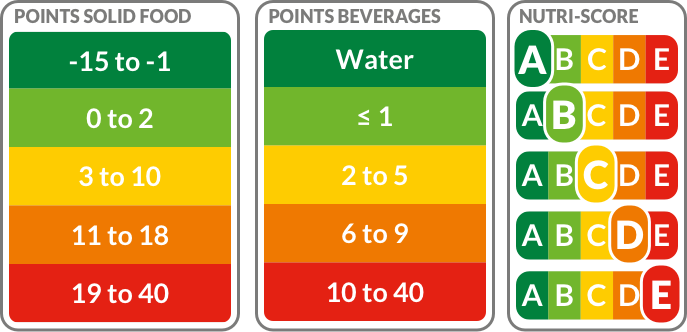

In [139]:

Image(filename = str(dir_fig) + "/"+ str("nutriscore-table-en@1_5x.png"), width=500, height=500)


possible source de erreur: la division de nutriscore des liquid et solid food ne sont pas identique. 
penser à separer les produits en 2 categories?